<a href="https://colab.research.google.com/github/beyzaturku/Weather_Detection_Using_CNN/blob/main/Weather_Detection_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python --version

Python 3.11.11


In [3]:
!pip install opencv-python

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
zip_path = '/content/drive/MyDrive/Weather_Detection/wd_dataset.zip'

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Google Colab'a dosya yükleme işlemi

In [54]:
from google.colab import files
uploaded = files.upload()

Veri Setini Yükleme

In [6]:
# Assuming 'wd_dataset' is the extracted folder name inside your Google Drive
image_folder = '/content/drive/MyDrive/Weather_Detection/Multi_Class_Weather_Dataset'


subfolders = [ 'Cloudy', 'Rain', 'Shine', 'Sunrise']
label_map = { subfolder: idx for idx, subfolder in enumerate(subfolders)}

# List of Images and Labels
images = []
labels = []

# Loading Dataset
for subfolder in subfolders:
    subfolder_path = os.path.join(image_folder, subfolder)
    for filename in os.listdir(subfolder_path):
        img_path = os.path.join(subfolder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, (224,224))
            images.append(img_resized)
            labels.append(label_map[subfolder])

# Coverted to Numpy Arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the Images
images = images.astype('float32') / 255.0

Dosya path'lerini kategorilendirme

In [7]:
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes = len(subfolders))

#labels dizisi, her görüntünün sınıfını belirten sayısal etiketleri içerir.
#labels dizininde bulunan kategori etiketlerini one-hot encoding formatına dönüştürür.

Veri Setini Bölme

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size = 0.2, stratify = labels_one_hot, random_state = 42)

Model Mimarisi Kurma

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(1,1),input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(4, activation='softmax'))


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=20, verbose=2, batch_size=50)

Epoch 1/20
18/18 - 16s - 875ms/step - accuracy: 0.4610 - loss: 1.1056
Epoch 2/20
18/18 - 1s - 57ms/step - accuracy: 0.6425 - loss: 0.8191
Epoch 3/20
18/18 - 1s - 56ms/step - accuracy: 0.7461 - loss: 0.6348
Epoch 4/20
18/18 - 1s - 58ms/step - accuracy: 0.7506 - loss: 0.6030
Epoch 5/20
18/18 - 1s - 56ms/step - accuracy: 0.8174 - loss: 0.4793
Epoch 6/20
18/18 - 1s - 57ms/step - accuracy: 0.8229 - loss: 0.4755
Epoch 7/20
18/18 - 1s - 56ms/step - accuracy: 0.8352 - loss: 0.4279
Epoch 8/20
18/18 - 1s - 57ms/step - accuracy: 0.8452 - loss: 0.4004
Epoch 9/20
18/18 - 1s - 56ms/step - accuracy: 0.8742 - loss: 0.3320
Epoch 10/20
18/18 - 1s - 57ms/step - accuracy: 0.8764 - loss: 0.3050
Epoch 11/20
18/18 - 1s - 57ms/step - accuracy: 0.8920 - loss: 0.2949
Epoch 12/20
18/18 - 1s - 55ms/step - accuracy: 0.8898 - loss: 0.2964
Epoch 13/20
18/18 - 1s - 56ms/step - accuracy: 0.9053 - loss: 0.2377
Epoch 14/20
18/18 - 1s - 56ms/step - accuracy: 0.9120 - loss: 0.2197
Epoch 15/20
18/18 - 1s - 58ms/step - accu

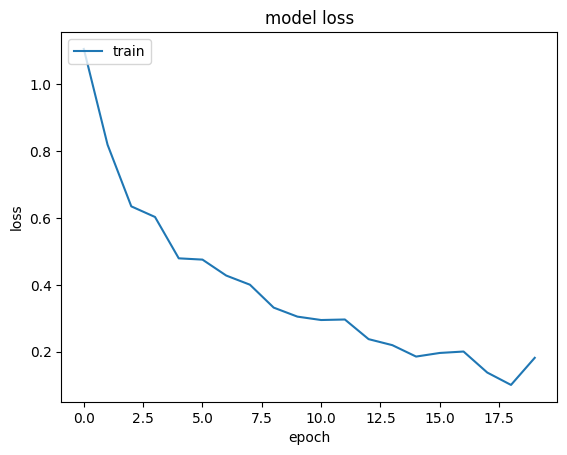

In [12]:
import matplotlib.pyplot as plt

# Loss graph
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss')
plt.show()


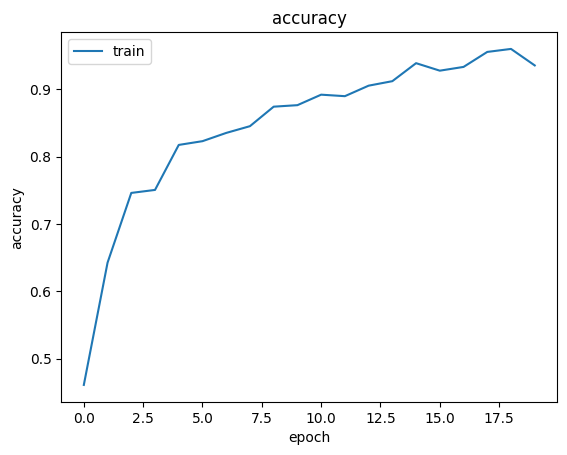

In [13]:
# Accuracy graph
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy')
plt.show()

In [14]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.8650 - loss: 0.4419
Test accuracy: 0.8711110949516296
Test loss: 0.4563945233821869


In [15]:
# Classification Report

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=subfolders))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
              precision    recall  f1-score   support

      Cloudy       0.75      0.90      0.82        60
        Rain       0.79      0.70      0.74        43
       Shine       0.96      0.86      0.91        50
     Sunrise       0.99      0.96      0.97        72

    accuracy                           0.87       225
   macro avg       0.87      0.85      0.86       225
weighted avg       0.88      0.87      0.87       225



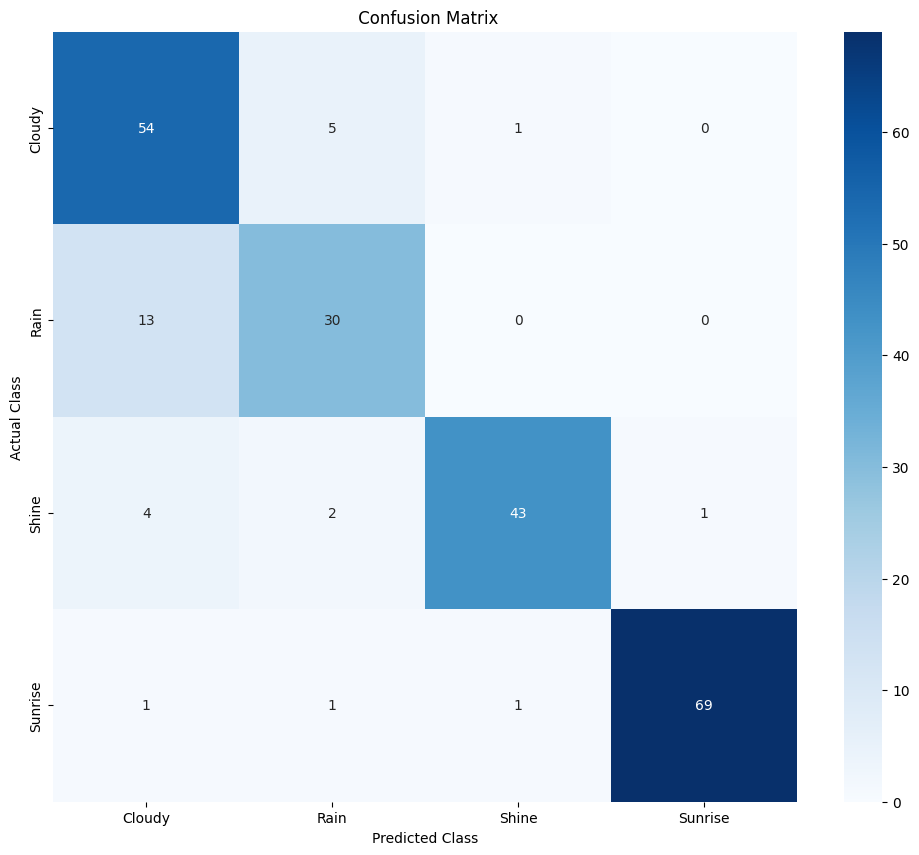

In [16]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (12,10))
sns.heatmap(conf_mat , annot =True, fmt = 'd', cmap = 'Blues', xticklabels = subfolders, yticklabels = subfolders)
plt.title(" Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()